In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
class_names = ['C', 'PF', 'SG', 'SF', 'PG', 'SF-SG', 'C-PF', 'PF-SF', 'SF-PF']

In [3]:
stats = pd.read_csv(r'nbaStats.csv')
classNum = 9

stats.dropna(inplace=True)
pos = stats.pop('Pos')
stats.pop('Tm')
stats.pop('Rk')

stats_train, stats_test, pos_train, pos_test = train_test_split(stats, pos, test_size=0.3)
pos_nums = [0, 1, 2, 3, 4, 5, 6, 7, 8]
pd.set_option("display.max_rows", None, "display.max_columns", None)

names_train = stats_train.pop('Player')
names_test = stats_test.pop('Player')

pos_test.head()

243    SG
140    SG
147    SG
419    SF
151    SG
Name: Pos, dtype: object

In [4]:
#Convert categorical df to numeric
pos_train = list(pos_train)
for i in range(len(pos_train)):
    pos_train[i] = class_names.index(str(pos_train[i]))
pos_train = pd.DataFrame(pos_train)

#Convert categorical df to numeric
pos_test = list(pos_test)
for i in range(len(pos_test)):
    pos_test[i] = class_names.index(str(pos_test[i]))
pos_test = pd.DataFrame(pos_test)
print(pos_test)

     0
0    2
1    2
2    2
3    3
4    2
5    0
6    2
7    4
8    4
9    4
10   3
11   1
12   4
13   0
14   2
15   5
16   2
17   1
18   3
19   2
20   4
21   2
22   1
23   1
24   0
25   1
26   4
27   1
28   4
29   0
30   4
31   2
32   1
33   3
34   3
35   2
36   2
37   2
38   4
39   2
40   0
41   3
42   0
43   4
44   4
45   3
46   0
47   2
48   2
49   1
50   2
51   1
52   1
53   2
54   4
55   2
56   4
57   0
58   2
59   4
60   2
61   1
62   4
63   1
64   1
65   1
66   1
67   0
68   3
69   2
70   2
71   3
72   2
73   2
74   4
75   0
76   3
77   1
78   3
79   2
80   0
81   1
82   3
83   1
84   4
85   1
86   2
87   1
88   0
89   2
90   3
91   3
92   2
93   0
94   2
95   4
96   3
97   2
98   0
99   3
100  4
101  3
102  1
103  1
104  2
105  1
106  3
107  1
108  1
109  1
110  3
111  1
112  5
113  2
114  2
115  1
116  0
117  3
118  4
119  1
120  3
121  1
122  3
123  4
124  4
125  1
126  2
127  0
128  2
129  2
130  2
131  2
132  3
133  3
134  4
135  1
136  4
137  0
138  4
139  2
140  0
141  1

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=stats_test.iloc[0].shape),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(9, activation='softmax') # output layer (3)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
accuracies = []
for i in range(0,10):
    model.fit(stats_train, pos_train, epochs=i)
    test_loss, test_acc = model.evaluate(stats_test, pos_test, verbose=1)
    accuracies.append(test_acc)

6/6 [==============================] - 0s 607us/step - loss: 3.6627 - accuracy: 0.1964
Epoch 1/2
13/13 [==============================] - 0s 920us/step - loss: 2.5967 - accuracy: 0.2699
Epoch 2/2
6/6 [==============================] - 0s 694us/step - loss: 1.7710 - accuracy: 0.3155
Epoch 1/3
13/13 [==============================] - 0s 941us/step - loss: 1.6589 - accuracy: 0.3548
Epoch 2/3
13/13 [==============================] - 0s 851us/step - loss: 1.5575 - accuracy: 0.3753
Epoch 3/3
6/6 [==============================] - 0s 730us/step - loss: 1.5480 - accuracy: 0.3690
Epoch 1/4
13/13 [==============================] - 0s 910us/step - loss: 1.4767 - accuracy: 0.4036
Epoch 2/4
13/13 [==============================] - 0s 1ms/step - loss: 1.4106 - accuracy: 0.4524
Epoch 3/4
13/13 [==============================] - 0s 830us/step - loss: 1.3596 - accuracy: 0.4370
Epoch 4/4
6/6 [==============================] - 0s 633us/step - loss: 1.4470 - accuracy: 0.4345
Epoch 1/5
13/13 [=============

In [7]:
np.argmax(accuracies)

7

In [8]:
model.fit(stats_train, pos_train, epochs=5)
test_loss, test_acc = model.evaluate(stats_test, pos_test, verbose=1) 

print('Test accuracy:', test_acc)

Epoch 1/5
13/13 [==============================] - 0s 844us/step - loss: 0.9025 - accuracy: 0.6272
Epoch 2/5
13/13 [==============================] - 0s 898us/step - loss: 0.9186 - accuracy: 0.6324
Epoch 3/5
13/13 [==============================] - 0s 824us/step - loss: 0.8997 - accuracy: 0.6375
Epoch 4/5
13/13 [==============================] - 0s 903us/step - loss: 0.9055 - accuracy: 0.5964
Epoch 5/5
6/6 [==============================] - 0s 1ms/step - loss: 1.3483 - accuracy: 0.5536
Test accuracy: 0.5535714030265808


In [9]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(stats_test)

Dusty Hannahs\hannadu01
Prediction: SG Actual: SG


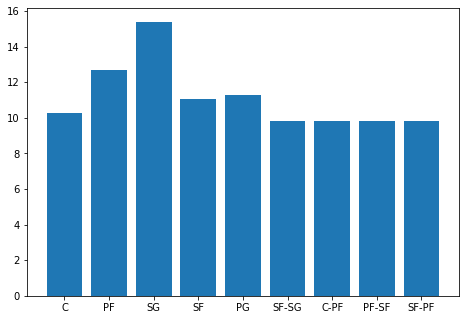

Allen Crabbe\crabbal01
Prediction: SG Actual: SG


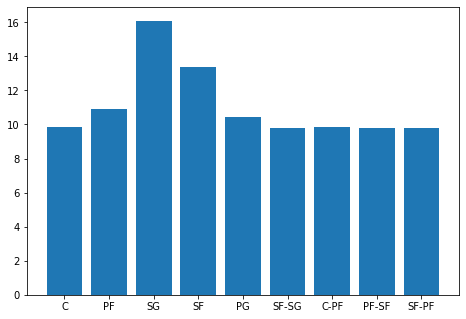

Jarrett Culver\culveja01
Prediction: SG Actual: SG


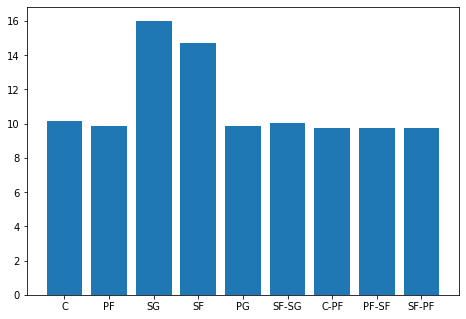

Marcus Morris\morrima03
Prediction: SF Actual: SF


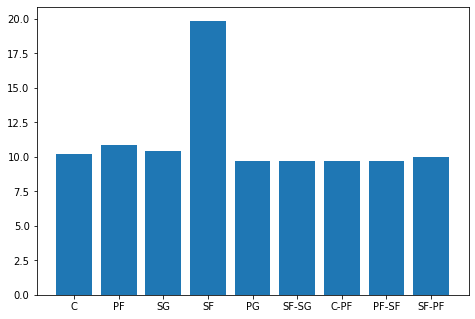

Troy Daniels\danietr01
Prediction: SG Actual: SG


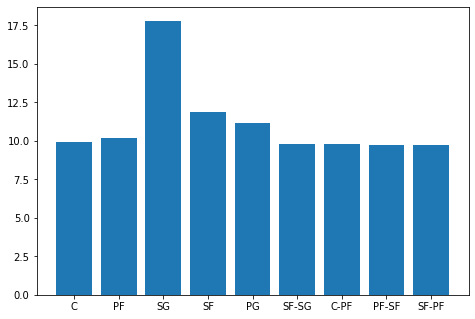

Serge Ibaka\ibakase01
Prediction: C Actual: C


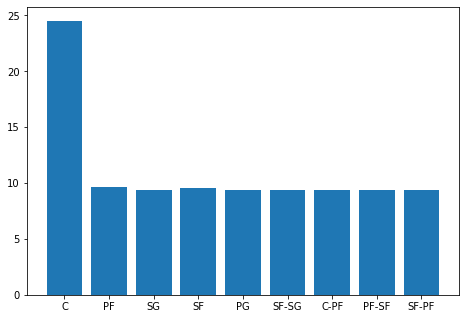

Grayson Allen\allengr01
Prediction: SG Actual: SG


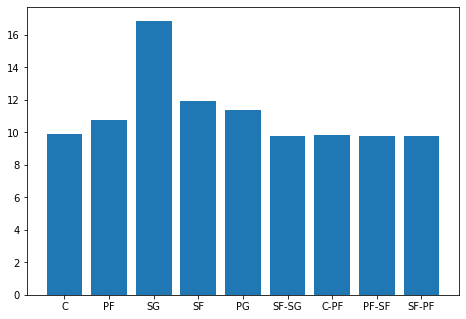

Derrick Walton\waltode01
Prediction: SG Actual: PG


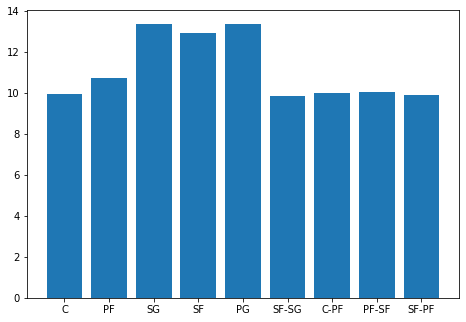

Ty Jerome\jeromty01
Prediction: SG Actual: PG


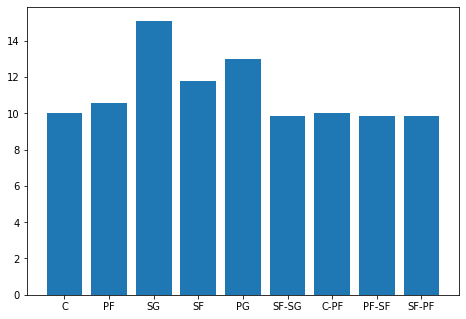

D'Angelo Russell\russeda01
Prediction: PG Actual: PG


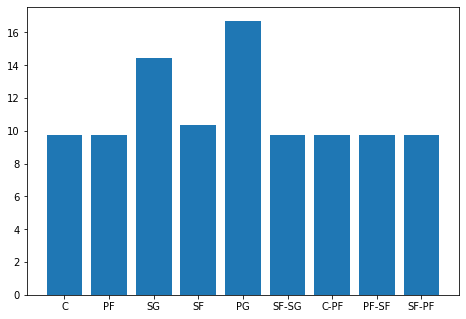

Sekou Doumbouya\doumbse01
Prediction: SF Actual: SF


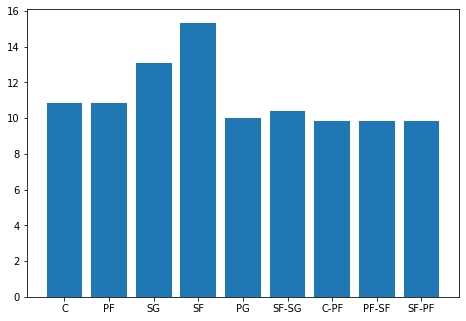

Dorian Finney-Smith\finnedo01
Prediction: SF Actual: PF


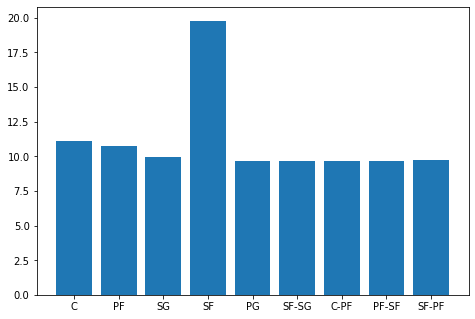

Reggie Jackson\jacksre01
Prediction: PG Actual: PG


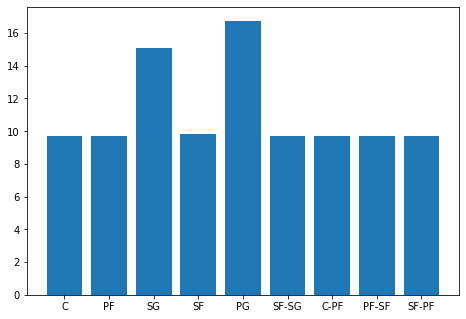

Kelly Olynyk\olynyke01
Prediction: SF Actual: C


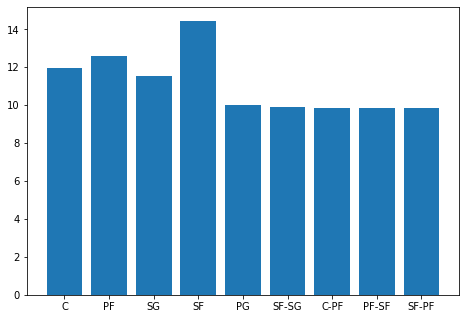

Anfernee Simons\simonan01
Prediction: SG Actual: SG


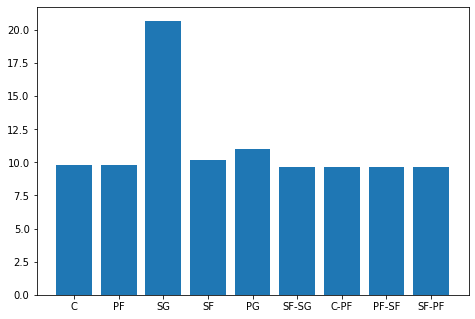

Andrew Wiggins\wiggian01
Prediction: SF Actual: SF-SG


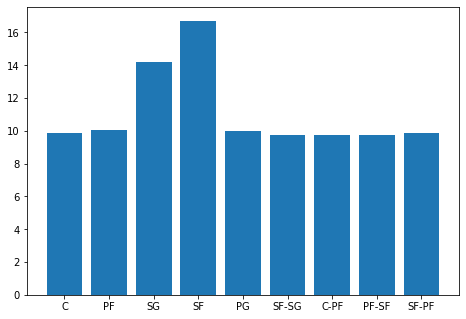

Avery Bradley\bradlav01
Prediction: SF Actual: SG


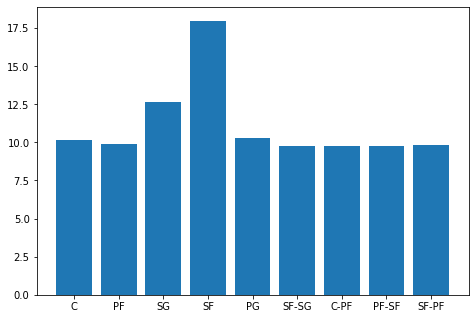

Grant Williams\willigr01
Prediction: C Actual: PF


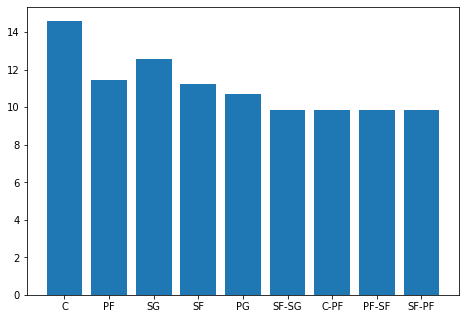

Glenn Robinson III\robingl02
Prediction: SF Actual: SF


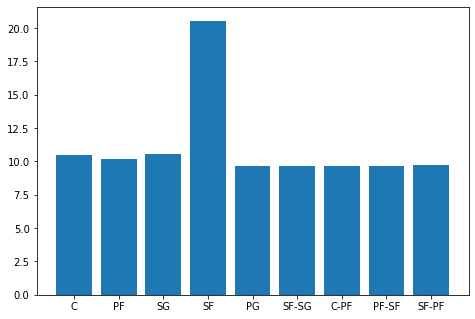

Marco Belinelli\belinma01
Prediction: SG Actual: SG


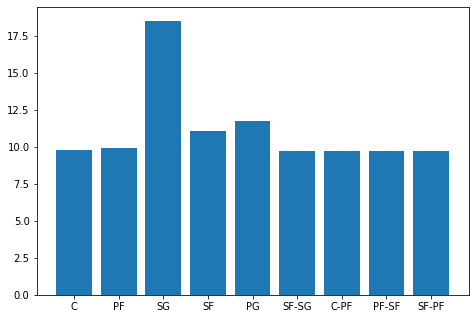

Chris Chiozza\chiozch01
Prediction: PG Actual: PG


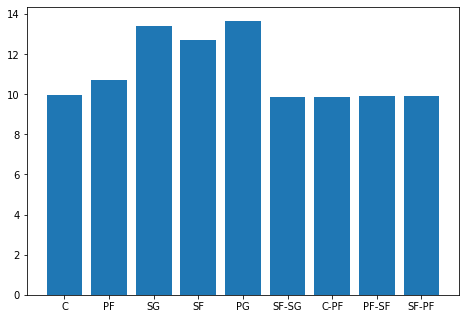

Jerome Robinson\robinje01
Prediction: SG Actual: SG


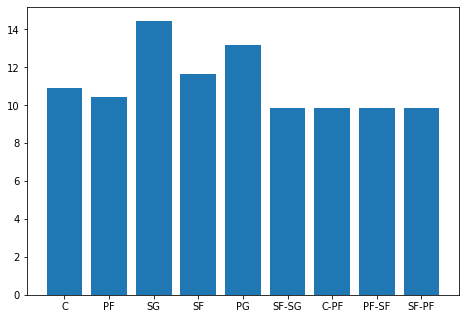

Markieff Morris\morrima02
Prediction: PF Actual: PF


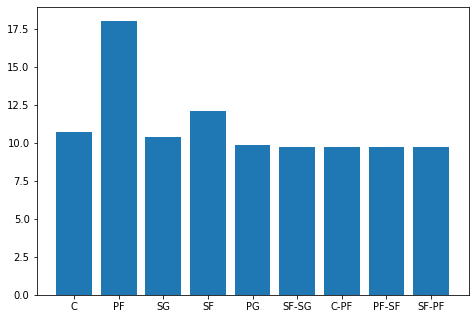

Thaddeus Young\youngth01
Prediction: SG Actual: PF


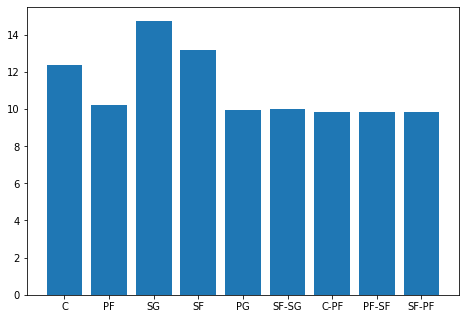

Hassan Whiteside\whiteha01
Prediction: C Actual: C


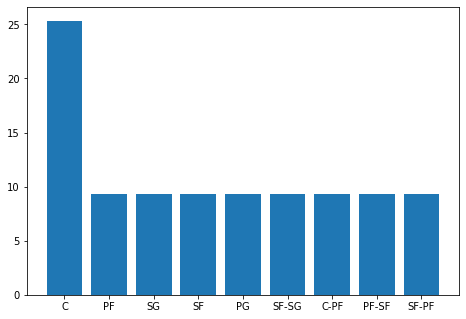

Zion Williamson\willizi01
Prediction: C Actual: PF


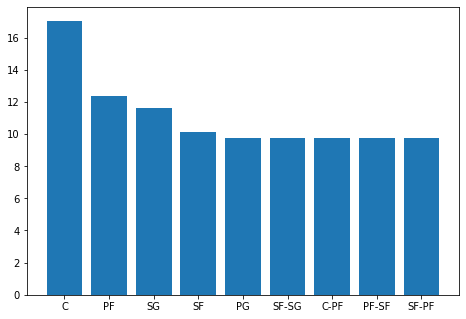

Alex Caruso\carusal01
Prediction: PG Actual: PG


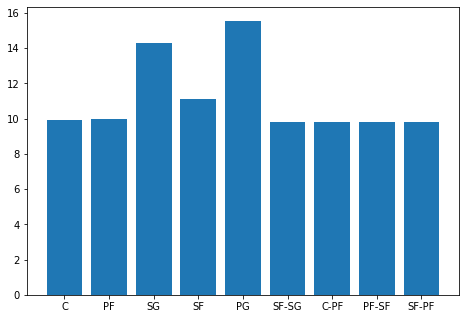

Marquese Chriss\chrisma01
Prediction: C Actual: PF


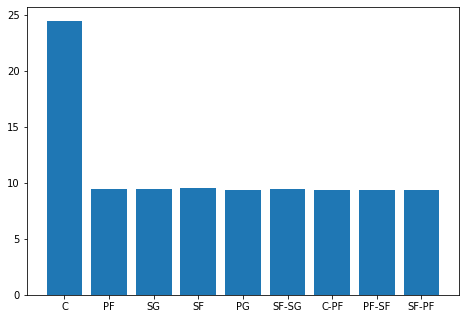

Ish Smith\smithis01
Prediction: PG Actual: PG


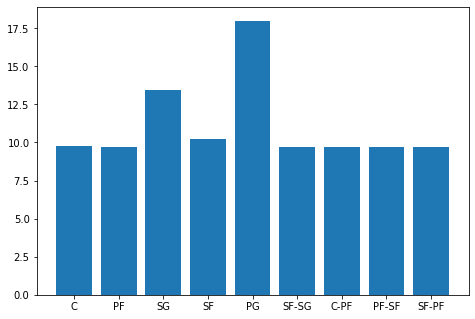

Moritz Wagner\wagnemo01
Prediction: C Actual: C


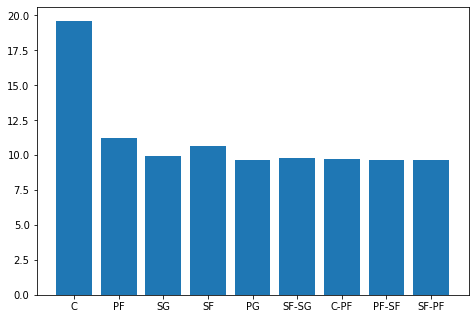

Luka Dončić\doncilu01
Prediction: SF Actual: PG


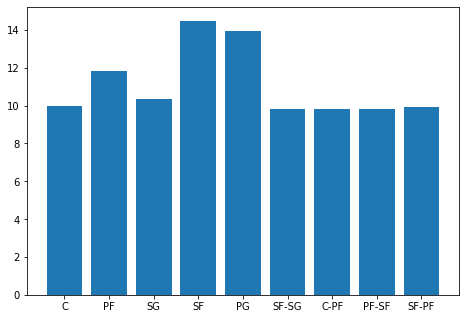

Evan Fournier\fournev01
Prediction: SG Actual: SG


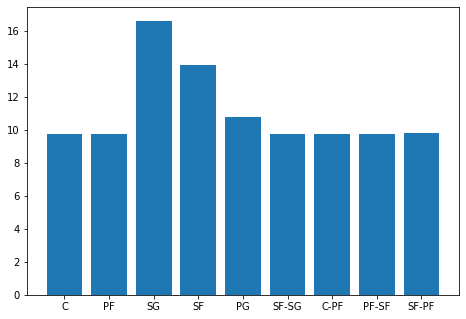

Jerami Grant\grantje01
Prediction: SG Actual: PF


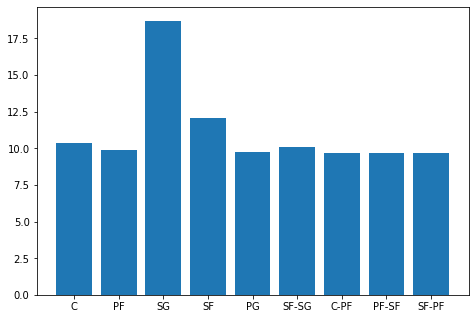

Rondae Hollis-Jefferson\holliro01
Prediction: C Actual: SF


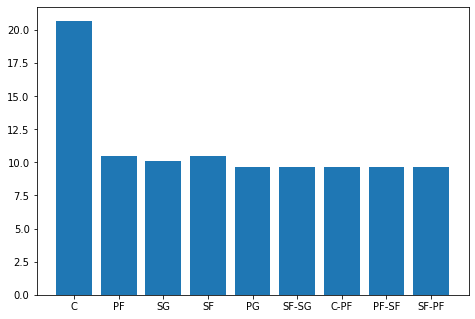

Isaac Bonga\bongais01
Prediction: SF Actual: SF


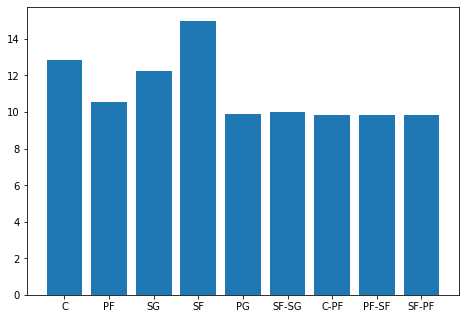

Michael Frazier\frazimi01
Prediction: SG Actual: SG


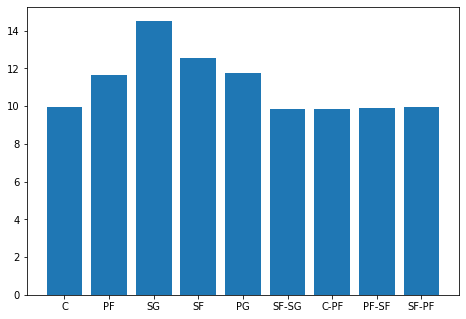

James Harden\hardeja01
Prediction: SF Actual: SG


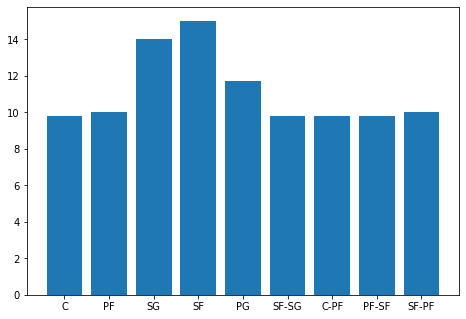

Dion Waiters\waitedi01
Prediction: PF Actual: SG


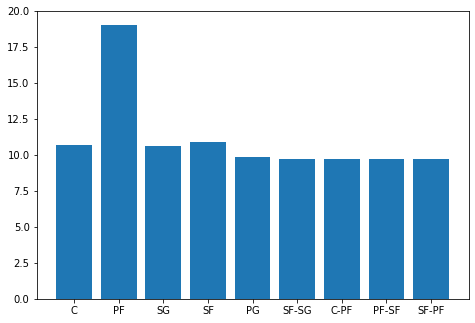

Brandon Knight\knighbr03
Prediction: PG Actual: PG


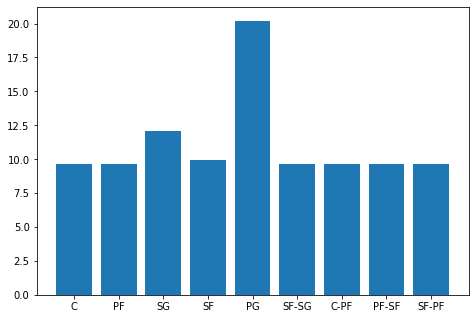

Devin Booker\bookede01
Prediction: SG Actual: SG


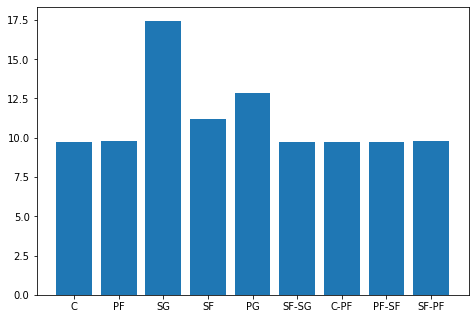

Kyle O'Quinn\oquinky01
Prediction: C Actual: C


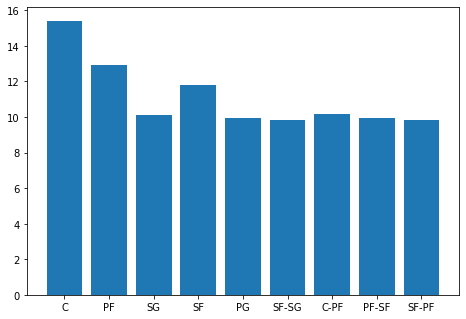

Admiral Schofield\schofad01
Prediction: SF Actual: SF


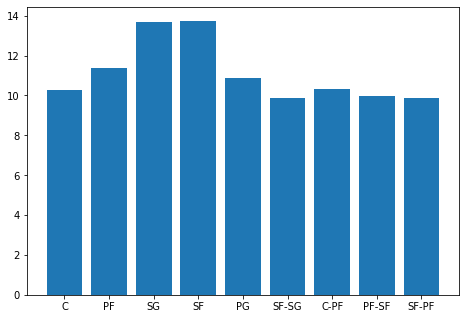

Nicolò Melli\mellini01
Prediction: SF Actual: C


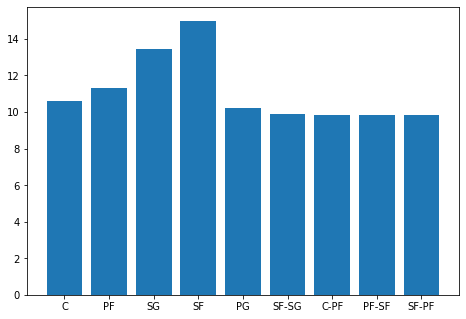

D'Angelo Russell\russeda01
Prediction: SG Actual: PG


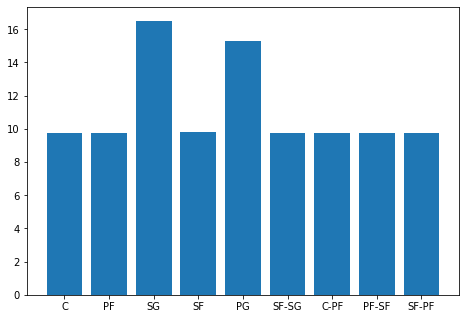

Edmond Sumner\sumneed01
Prediction: SG Actual: PG


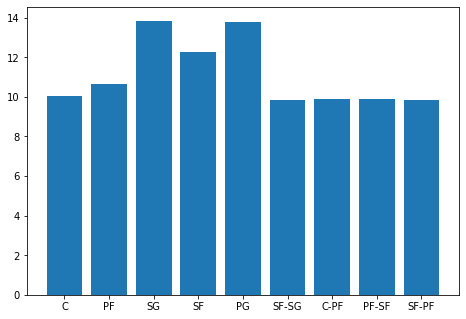

Oshae Brissett\brissos01
Prediction: SF Actual: SF


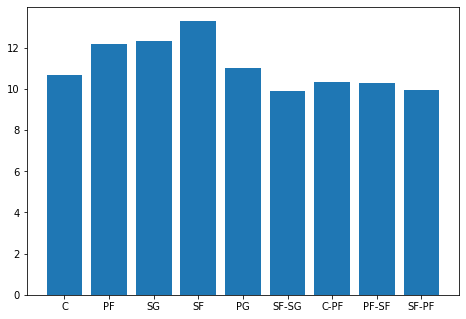

Dewayne Dedmon\dedmode01
Prediction: C Actual: C


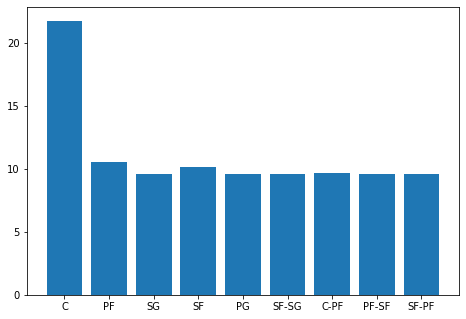

Dillon Brooks\brookdi01
Prediction: SF Actual: SG


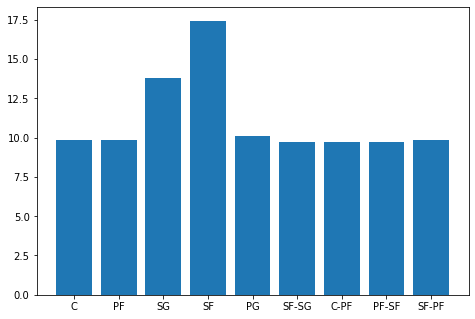

Caris LeVert\leverca01
Prediction: SG Actual: SG


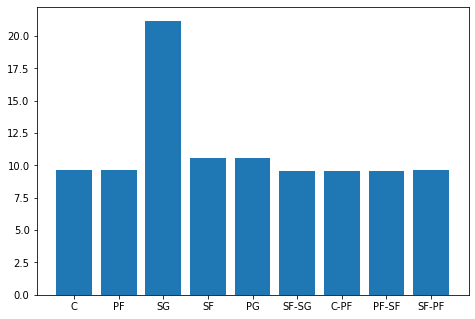

Georges Niang\niangge01
Prediction: SG Actual: PF


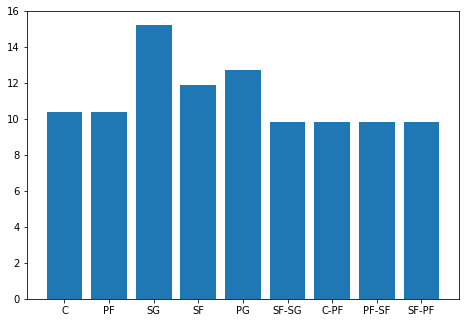

Khyri Thomas\thomakh01
Prediction: SG Actual: SG


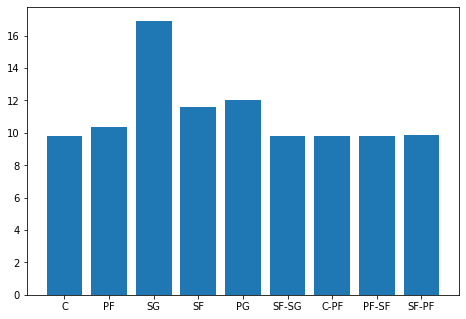

Wenyen Gabriel\gabriwe01
Prediction: SG Actual: PF


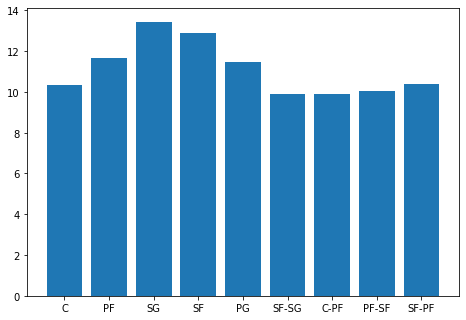

Thabo Sefolosha\sefolth01
Prediction: SF Actual: PF


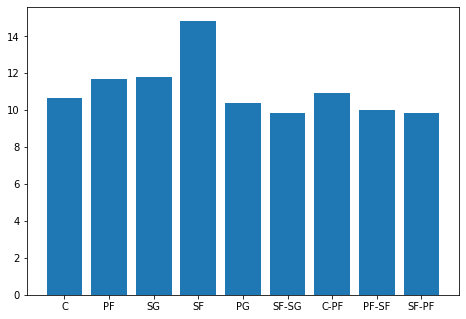

Collin Sexton\sextoco01
Prediction: SG Actual: SG


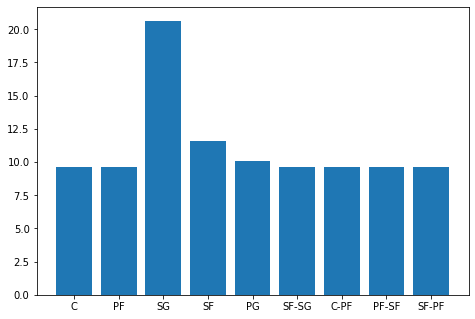

Ky Bowman\bowmaky01
Prediction: SG Actual: PG


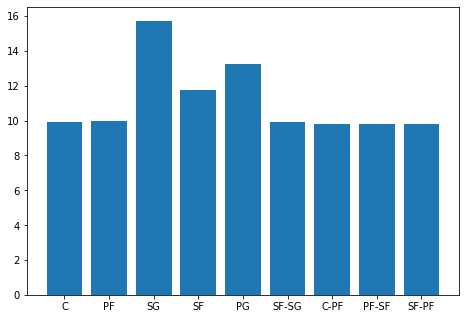

Jeremy Lamb\lambje01
Prediction: SF Actual: SG


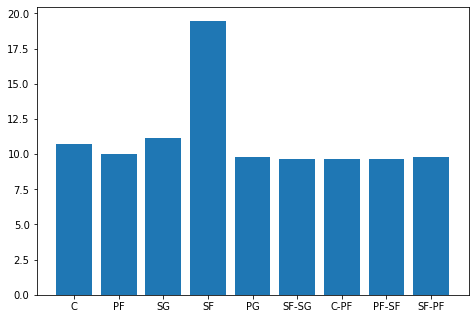

Markelle Fultz\fultzma01
Prediction: PG Actual: PG


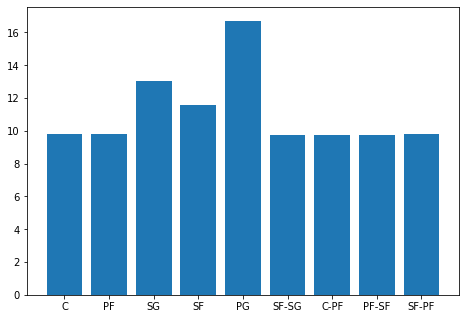

Isaiah Hartenstein\harteis01
Prediction: C Actual: C


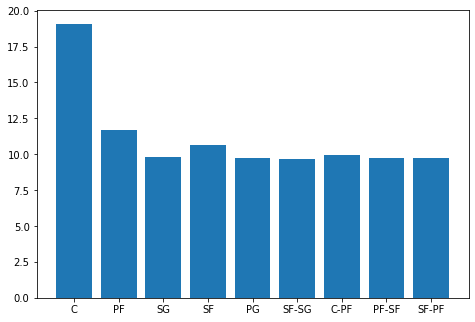

Max Strus\strusma01
Prediction: PF Actual: SG


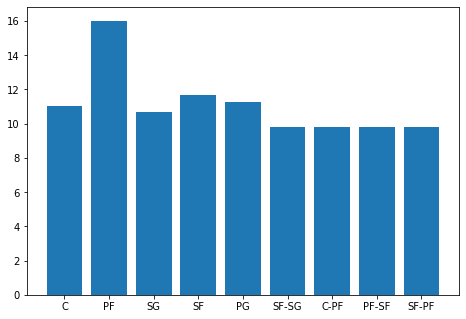

George Hill\hillge01
Prediction: SG Actual: PG


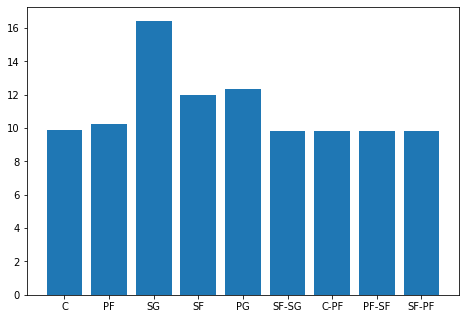

Landry Shamet\shamela01
Prediction: SG Actual: SG


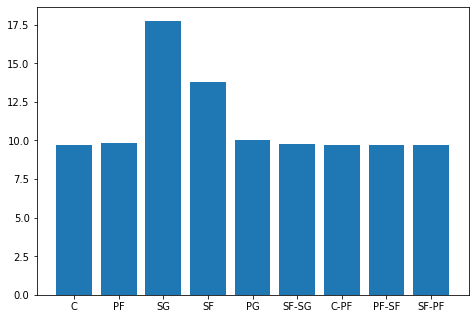

Omari Spellman\spellom01
Prediction: C Actual: PF


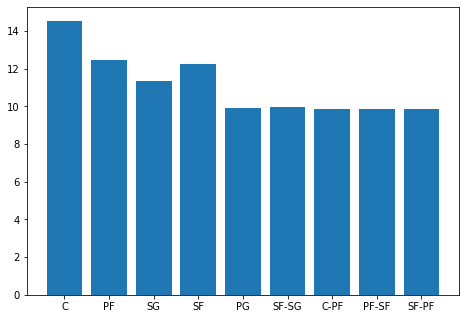

Rajon Rondo\rondora01
Prediction: PG Actual: PG


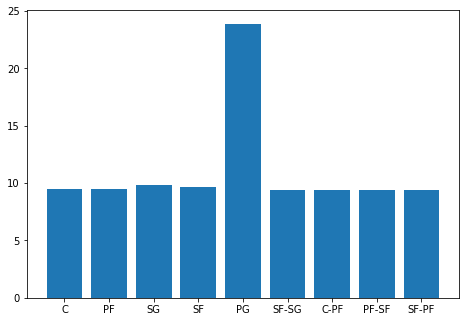

P.J. Washington\washipj01
Prediction: SF Actual: PF


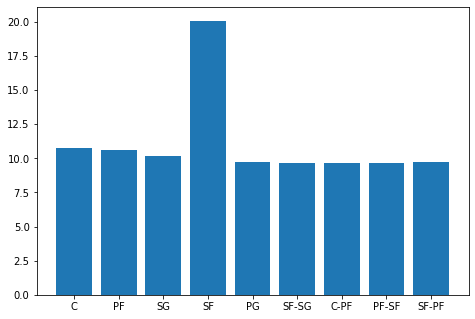

Dario Šarić\saricda01
Prediction: SF Actual: PF


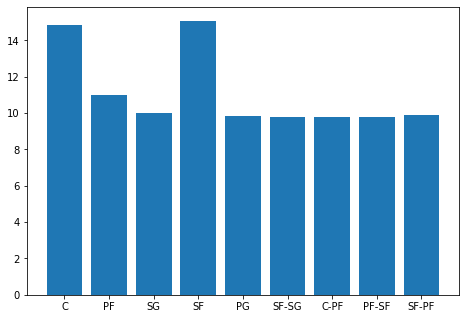

Markieff Morris\morrima02
Prediction: SG Actual: PF


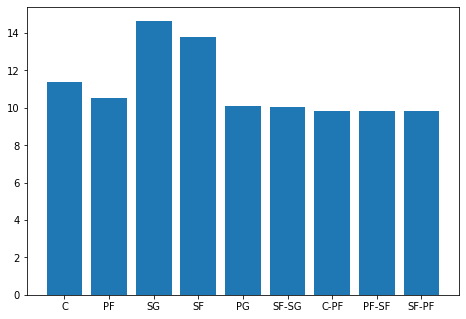

Kevin Love\loveke01
Prediction: C Actual: PF


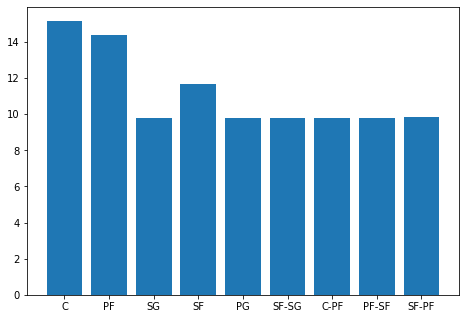

Anžejs Pasečņiks\pasecan01
Prediction: C Actual: C


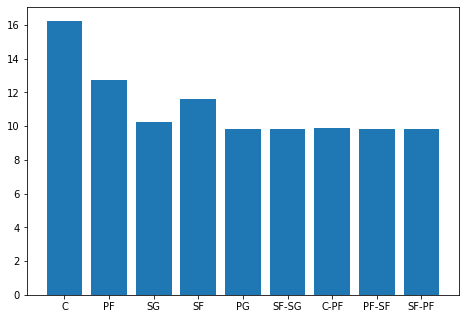

Terrance Ferguson\fergute01
Prediction: SF Actual: SF


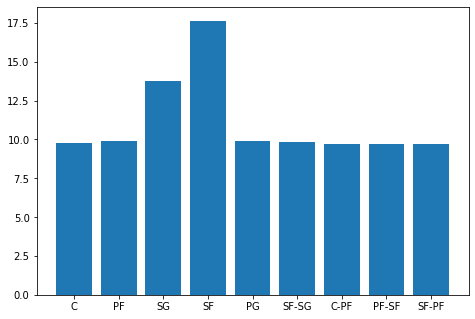

Jordan Clarkson\clarkjo01
Prediction: SG Actual: SG


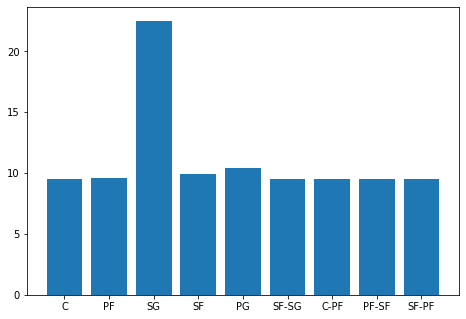

Luguentz Dort\dortlu01
Prediction: SF Actual: SG


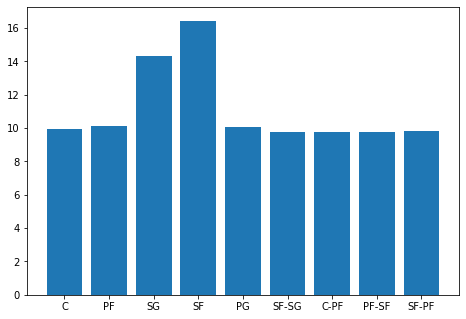

Džanan Musa\musadz01
Prediction: SG Actual: SF


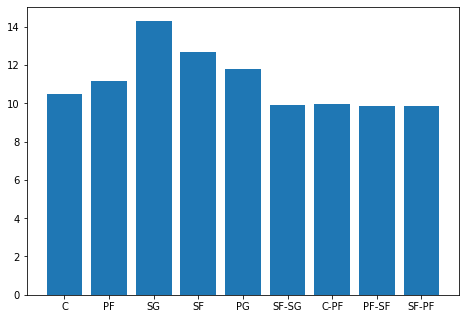

Zach LaVine\lavinza01
Prediction: SG Actual: SG


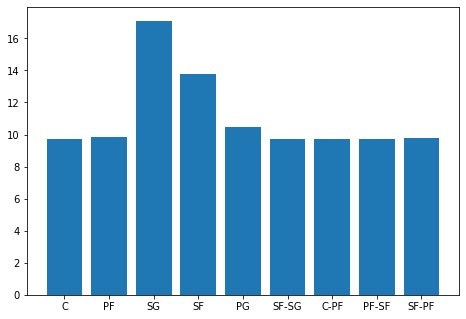

Danny Green\greenda02
Prediction: SF Actual: SG


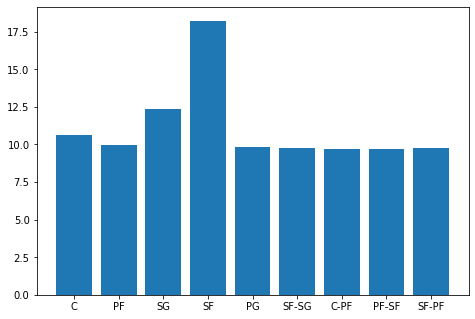

Gary Payton II\paytoga02
Prediction: SF Actual: PG


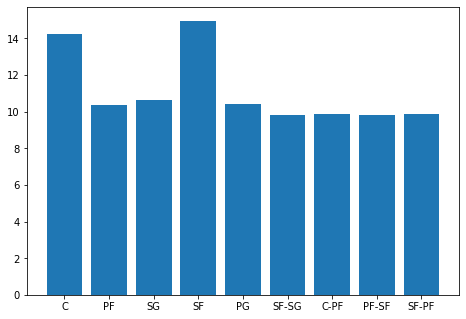

Karl-Anthony Towns\townska01
Prediction: PF Actual: C


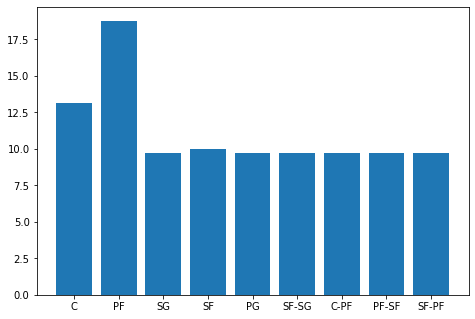

Javonte Green\greenja02
Prediction: SF Actual: SF


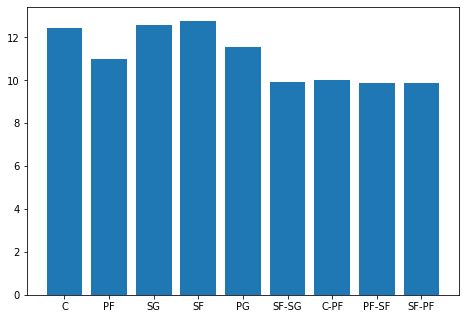

Doug McDermott\mcderdo01
Prediction: SG Actual: PF


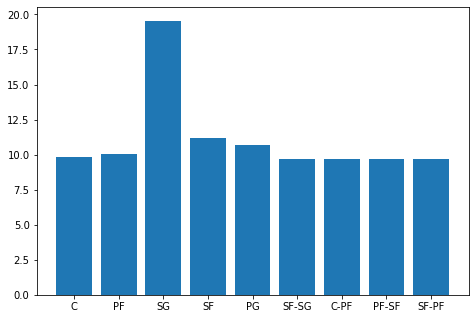

Justise Winslow\winslju01
Prediction: PF Actual: SF


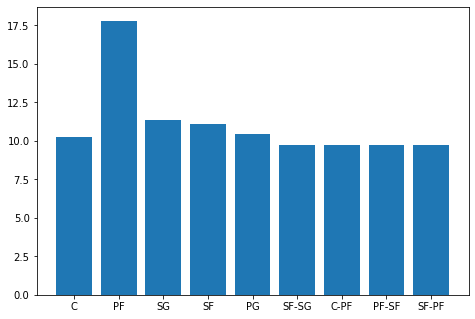

Jrue Holiday\holidjr01
Prediction: PG Actual: SG


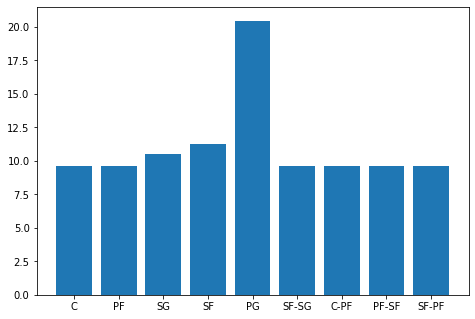

Maxi Kleber\klebima01
Prediction: SF Actual: C


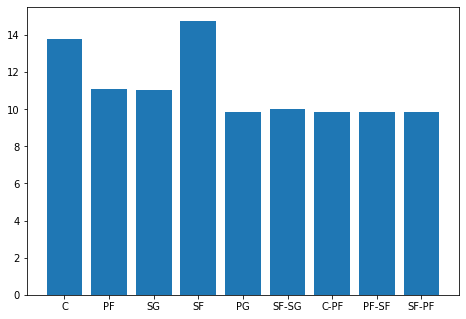

Juan Hernangómez\hernaju01
Prediction: PF Actual: PF


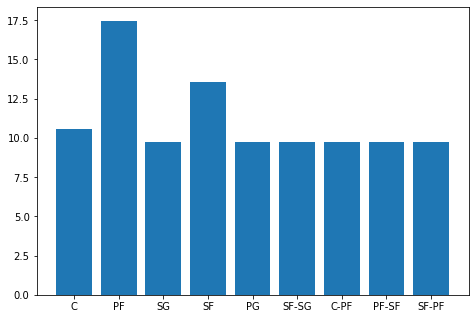

Wesley Iwundu\iwundwe01
Prediction: SF Actual: SF


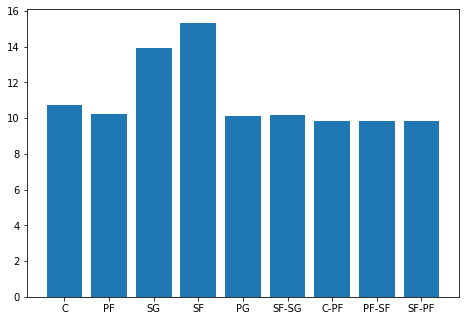

Chris Silva\silvach01
Prediction: C Actual: PF


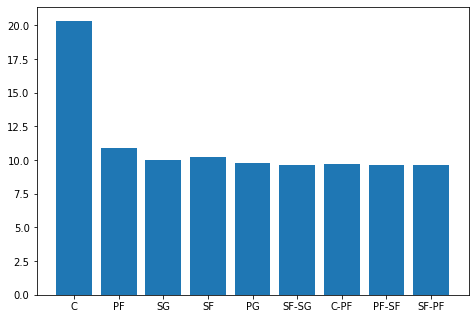

Elfrid Payton\paytoel01
Prediction: PG Actual: PG


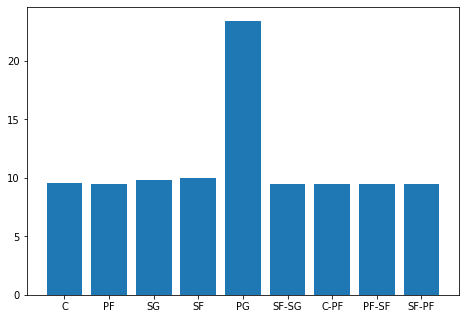

Giannis Antetokounmpo\antetgi01
Prediction: C Actual: PF


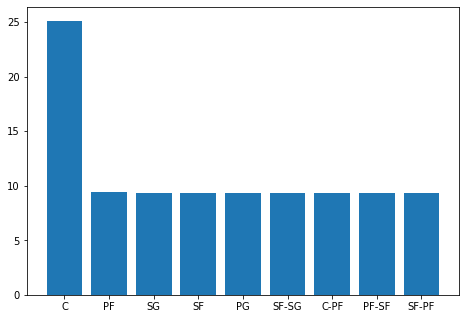

Wayne Ellington\ellinwa01
Prediction: SG Actual: SG


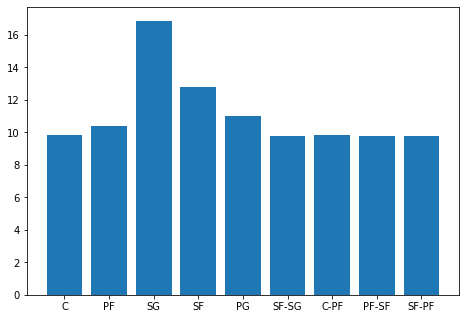

Justin Jackson\jacksju01
Prediction: SG Actual: PF


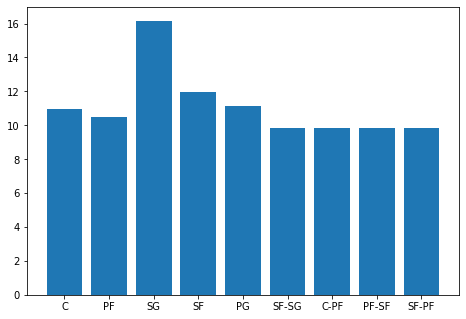

Willie Cauley-Stein\caulewi01
Prediction: C Actual: C


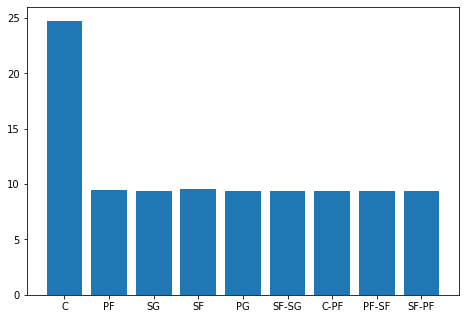

Courtney Lee\leeco01
Prediction: SF Actual: SG


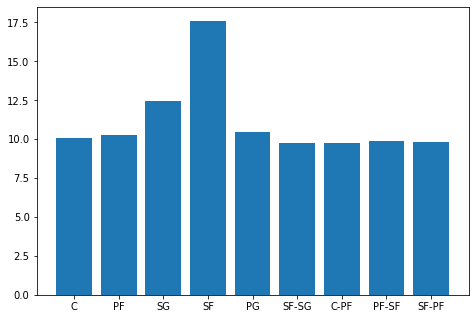

Hamidou Diallo\diallha01
Prediction: C Actual: SF


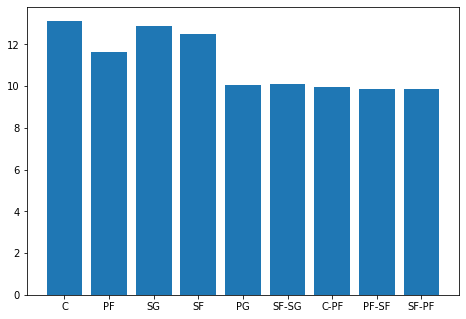

Michael Kidd-Gilchrist\kiddgmi01
Prediction: PF Actual: SF


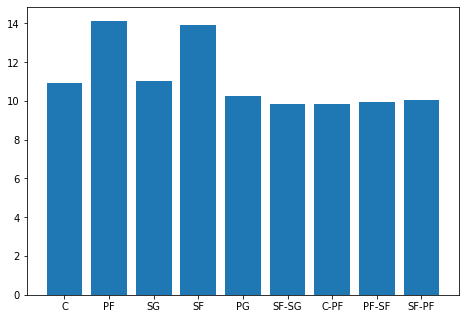

Tim Hardaway Jr.\hardati02
Prediction: SG Actual: SG


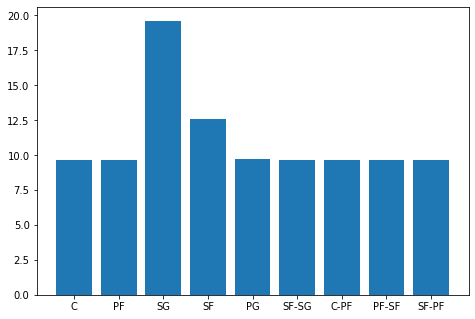

Wendell Carter Jr.\cartewe01
Prediction: C Actual: C


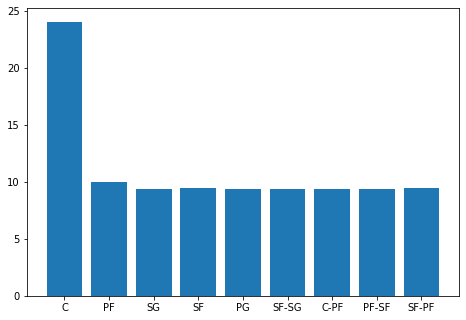

Bruce Brown\brownbr01
Prediction: SF Actual: SG


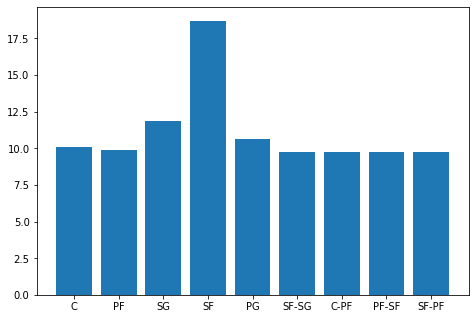

Monte Morris\morrimo01
Prediction: PG Actual: PG


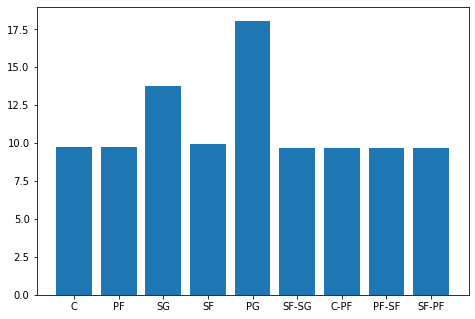

Kelan Martin\martike03
Prediction: SF Actual: SF


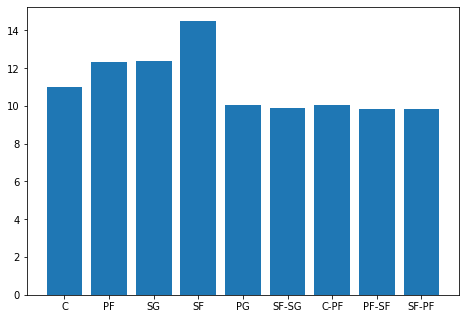

C.J. Miles\milescj01
Prediction: SG Actual: SG


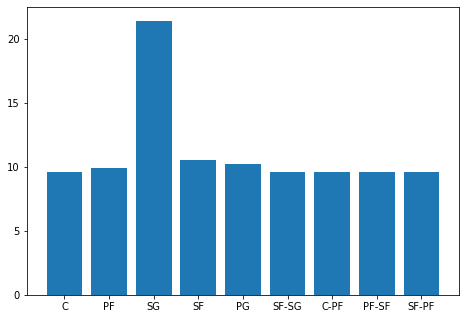

Thomas Bryant\bryanth01
Prediction: C Actual: C


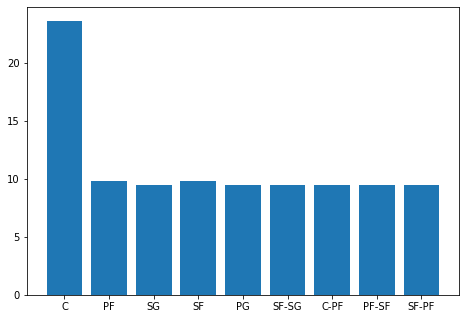

Derrick Jones Jr.\jonesde02
Prediction: SF Actual: SF


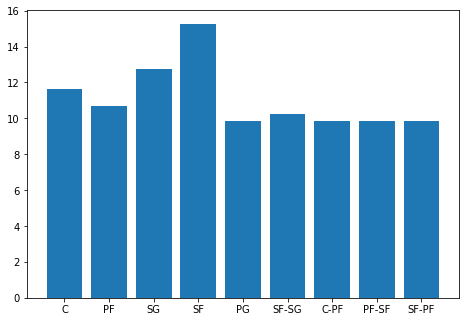

Jamal Murray\murraja01
Prediction: SG Actual: PG


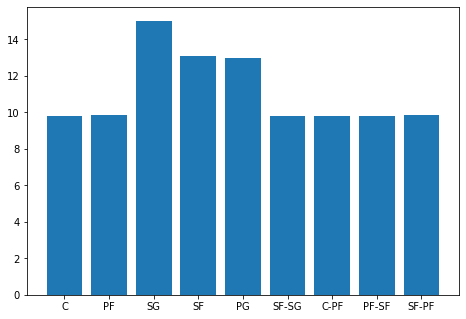

David Nwaba\nwabada01
Prediction: SF Actual: SF


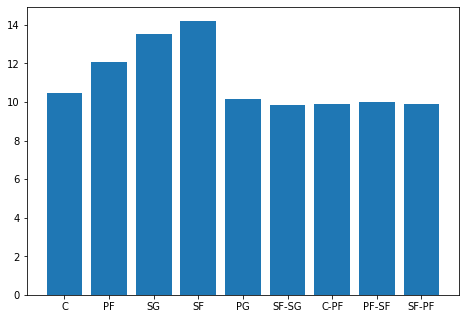

Dean Wade\wadede01
Prediction: PF Actual: PF


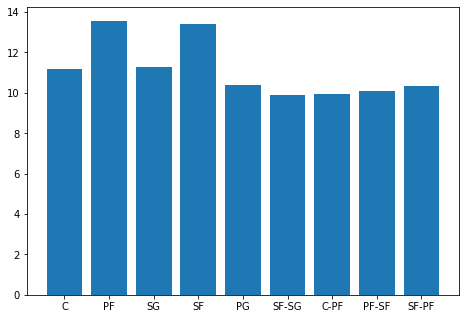

Jeff Green\greenje02
Prediction: SG Actual: PF


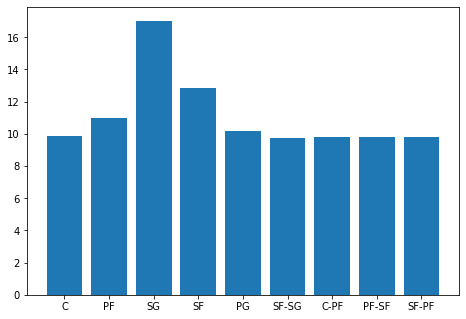

Reggie Bullock\bullore01
Prediction: SF Actual: SG


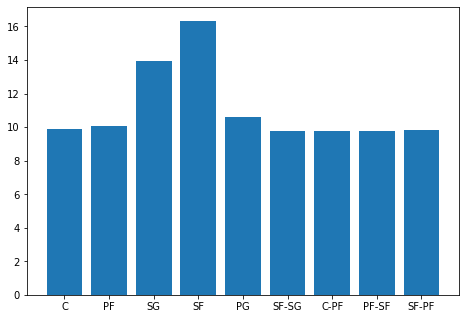

Nicolas Claxton\claxtni01
Prediction: PF Actual: PF


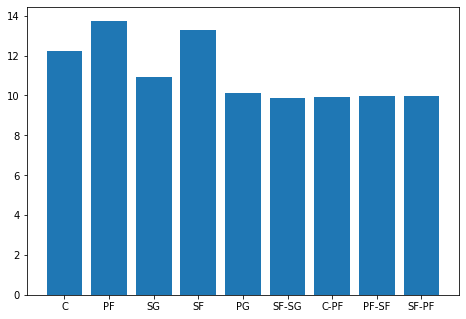

Kevin Porter Jr.\porteke02
Prediction: SG Actual: SF


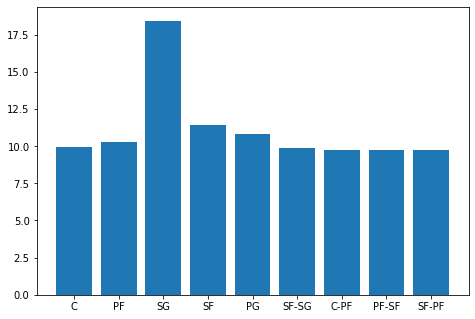

Anthony Davis\davisan02
Prediction: C Actual: PF


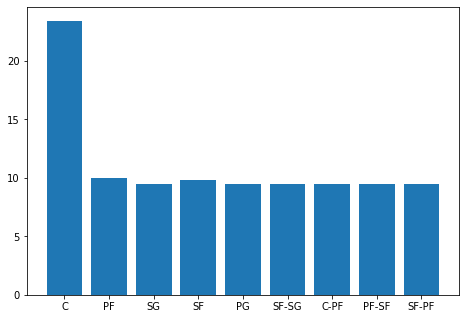

Caleb Swanigan\swanica01
Prediction: PF Actual: PF


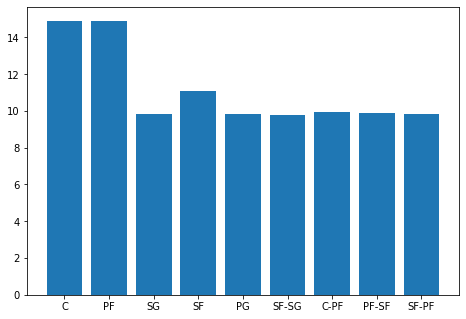

Gary Clark\clarkga01
Prediction: SF Actual: PF


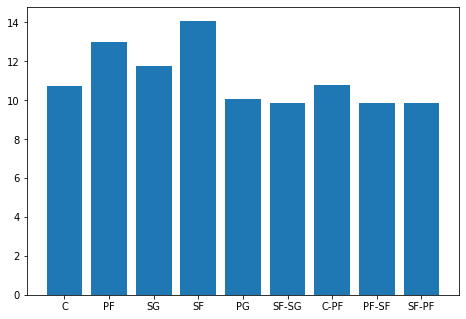

Jared Dudley\dudleja01
Prediction: SF Actual: SF


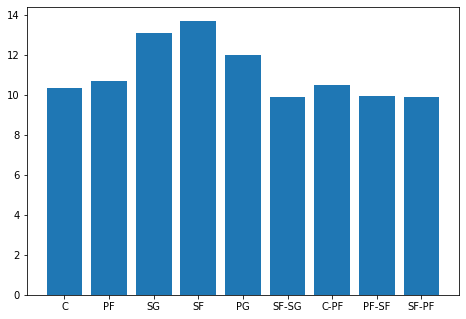

Udonis Haslem\hasleud01
Prediction: PF Actual: PF


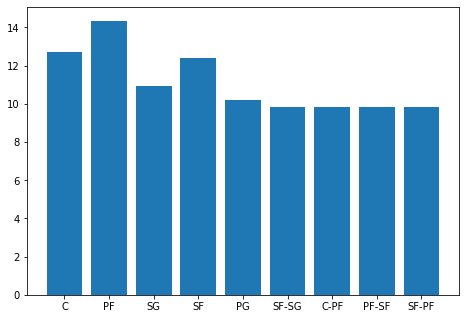

Paul Watson\watsopa01
Prediction: SG Actual: SF-SG


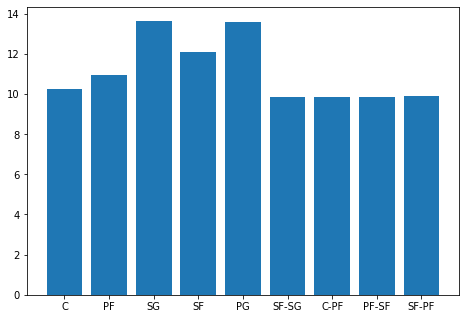

Zach Norvell\norveza01
Prediction: SG Actual: SG


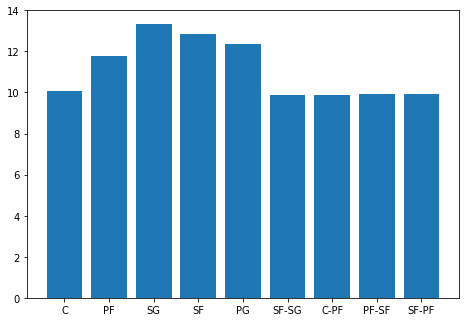

Kendrick Nunn\nunnke01
Prediction: SG Actual: SG


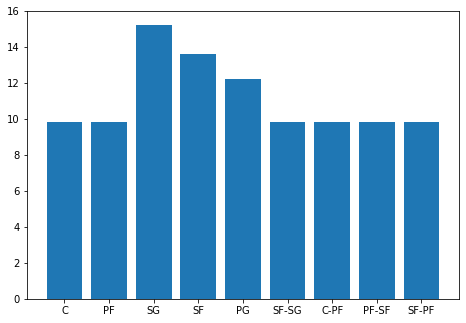

Brandon Clarke\clarkbr01
Prediction: C Actual: PF


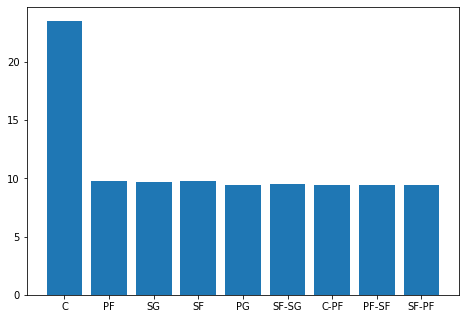

JaVale McGee\mcgeeja01
Prediction: C Actual: C


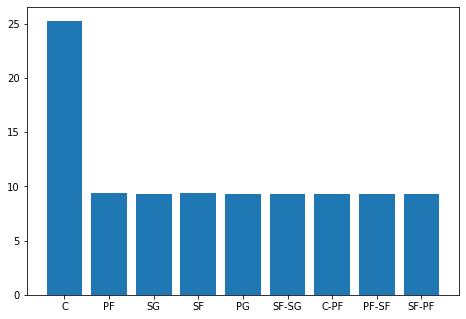

Maurice Harkless\harklma01
Prediction: SF Actual: SF


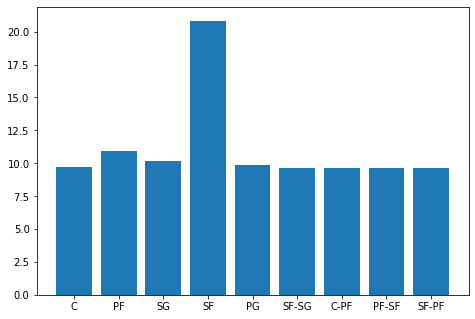

De'Aaron Fox\foxde01
Prediction: PG Actual: PG


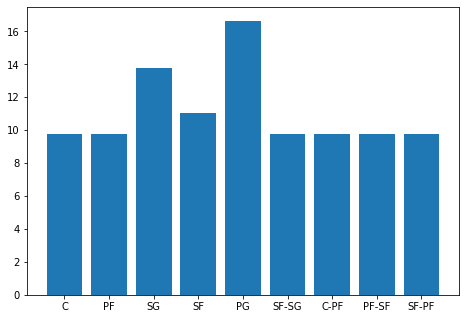

Anthony Tolliver\tollian01
Prediction: SF Actual: PF


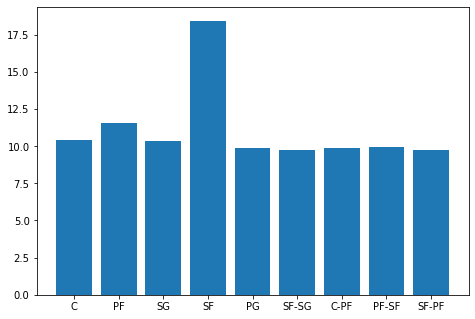

Louis King\kinglo02
Prediction: SG Actual: SF


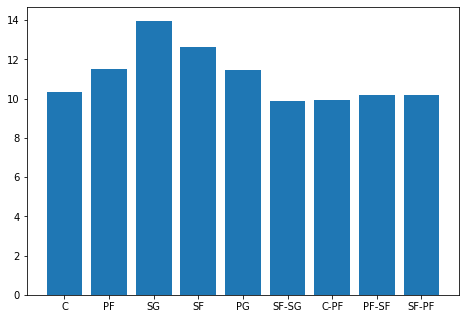

Marcus Morris\morrima03
Prediction: SF Actual: PF


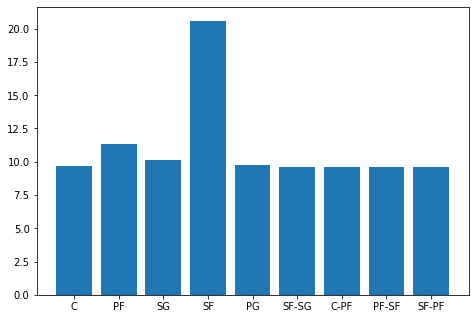

Keldon Johnson\johnske04
Prediction: SF Actual: SF


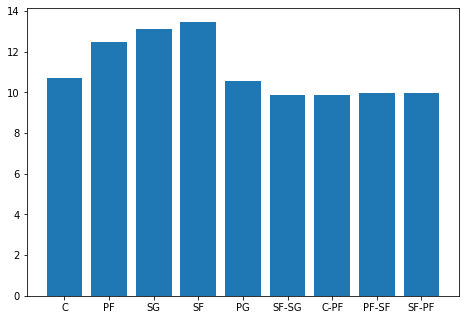

Ricky Rubio\rubiori01
Prediction: PG Actual: PG


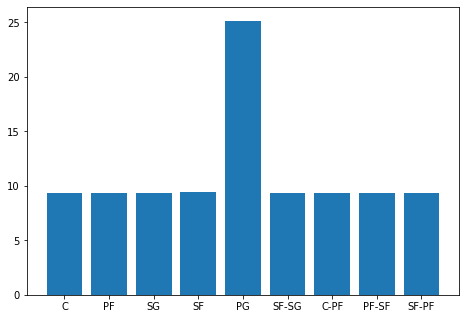

Jeff Teague\teaguje01
Prediction: PG Actual: PG


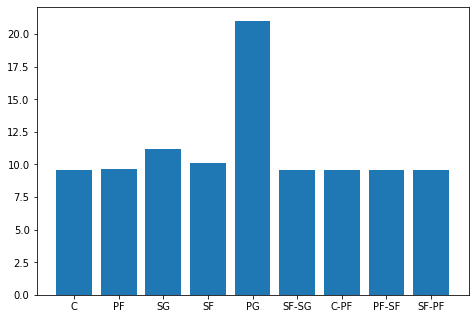

Paul Millsap\millspa01
Prediction: C Actual: PF


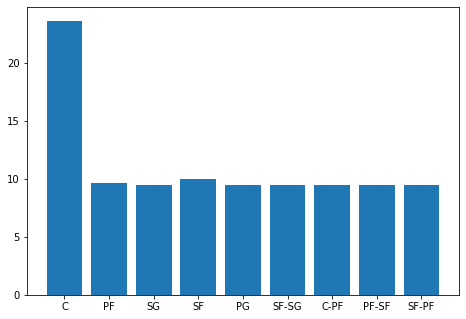

Austin Rivers\riverau01
Prediction: SG Actual: SG


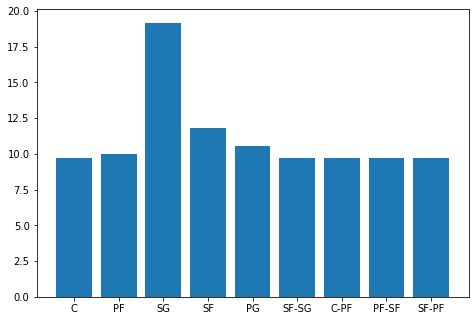

Johnathan Williams\willijo04
Prediction: C Actual: C


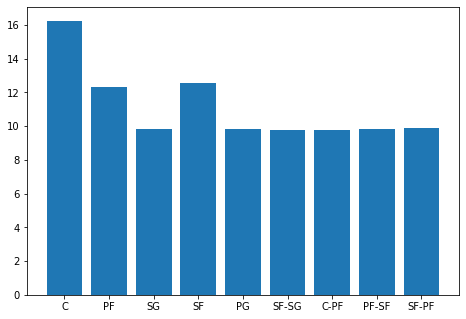

Terence Davis\daviste02
Prediction: SG Actual: SG


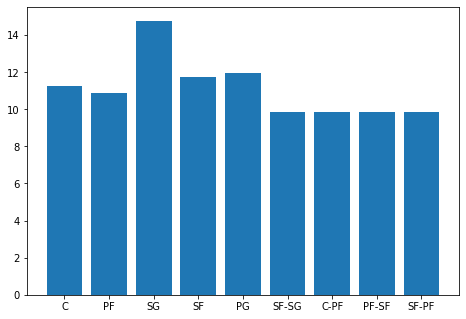

Donovan Mitchell\mitchdo01
Prediction: SG Actual: SG


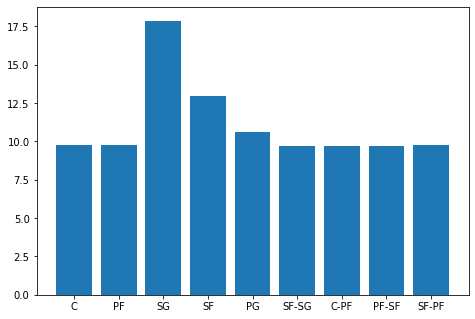

Kent Bazemore\bazemke01
Prediction: SG Actual: SG


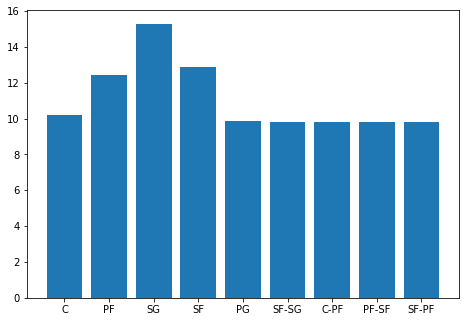

Antonius Cleveland\clevean01
Prediction: SF Actual: SG


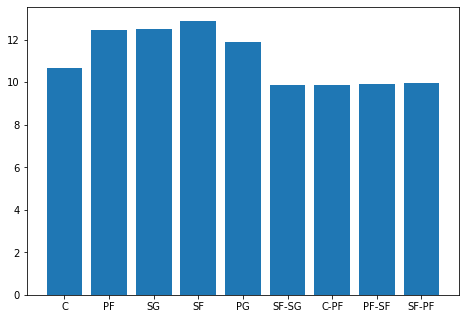

Kent Bazemore\bazemke01
Prediction: SF Actual: SF


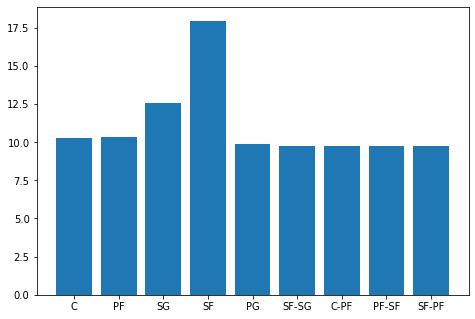

Vince Carter\cartevi01
Prediction: SG Actual: SF


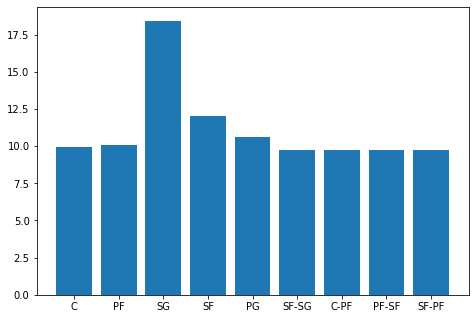

Kyrie Irving\irvinky01
Prediction: SG Actual: PG


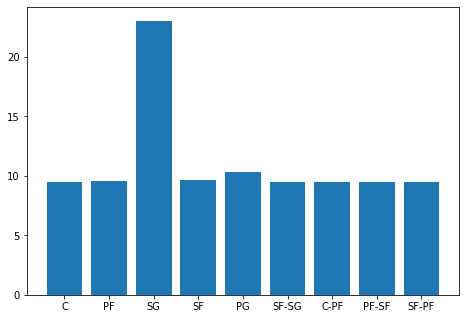

Rui Hachimura\hachiru01
Prediction: SF Actual: PF


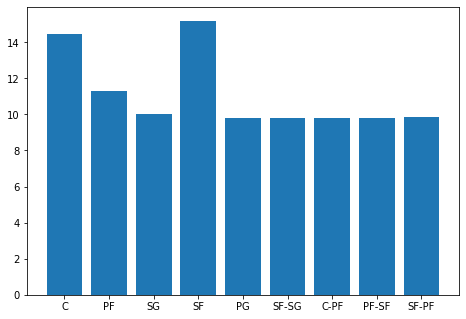

Emmanuel Mudiay\mudiaem01
Prediction: PG Actual: PG


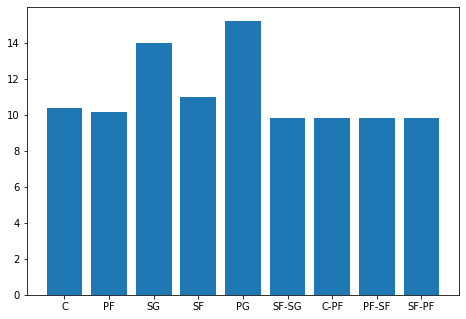

Domantas Sabonis\sabondo01
Prediction: C Actual: C


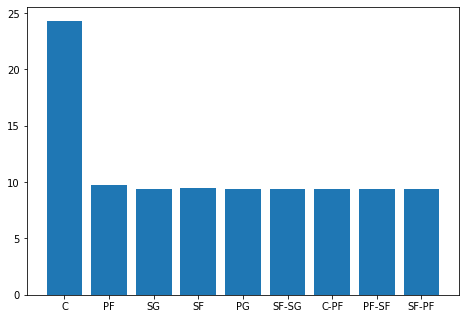

Lonzo Ball\balllo01
Prediction: PG Actual: PG


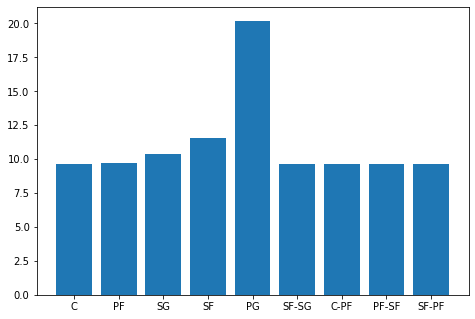

Chris Clemons\clemoch01
Prediction: SG Actual: SG


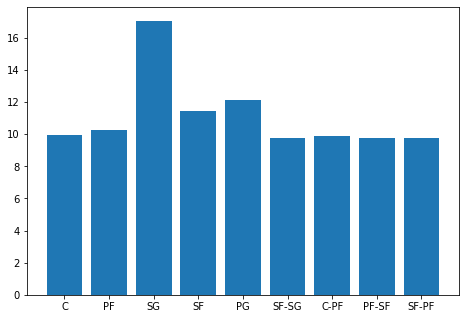

Jordan Bell\belljo01
Prediction: C Actual: C


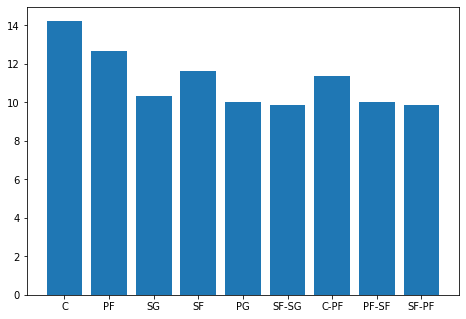

Christian Wood\woodch01
Prediction: C Actual: PF


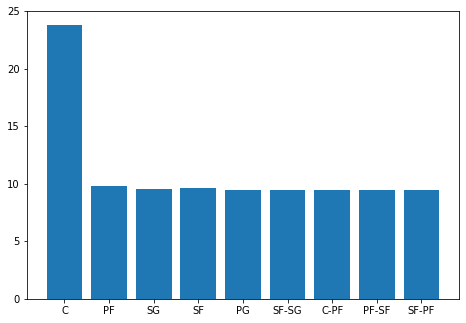

Johnathan Motley\motlejo01
Prediction: SG Actual: PF


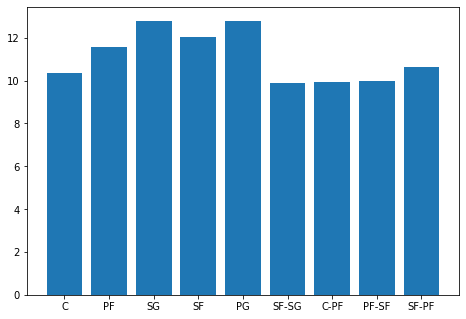

Romeo Langford\langfro01
Prediction: SG Actual: SG


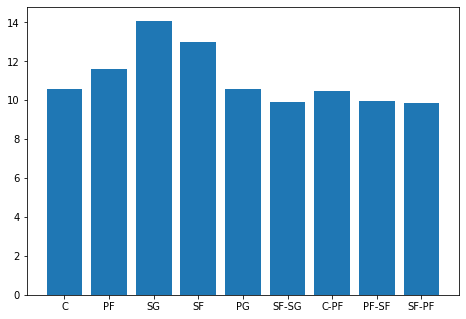

Kelly Oubre Jr.\oubreke01
Prediction: SF Actual: SF


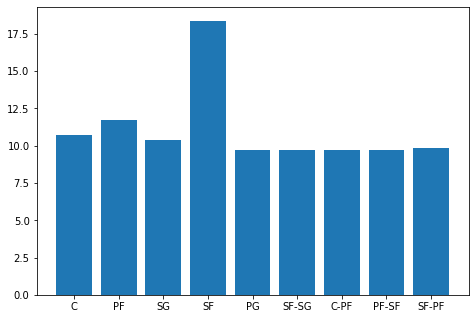

Kawhi Leonard\leonaka01
Prediction: SF Actual: SF


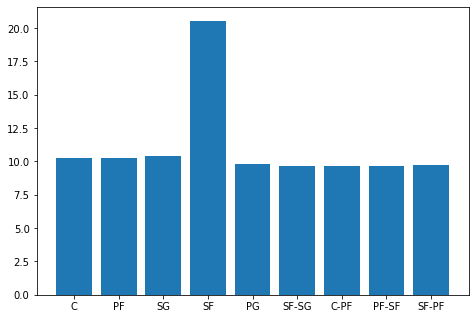

James Ennis\ennisja01
Prediction: SF Actual: SF


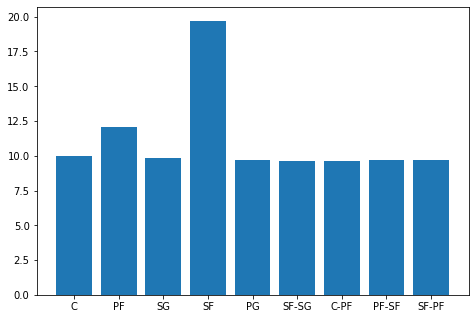

Justin Anderson\anderju01
Prediction: SG Actual: SF


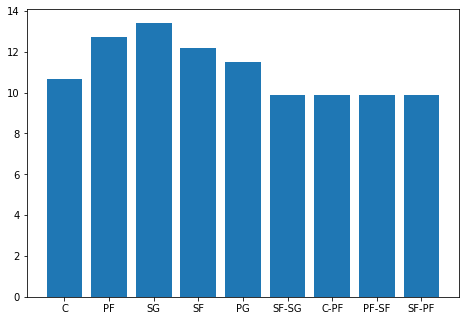

Jalen McDaniels\mcdanja01
Prediction: SF Actual: PF


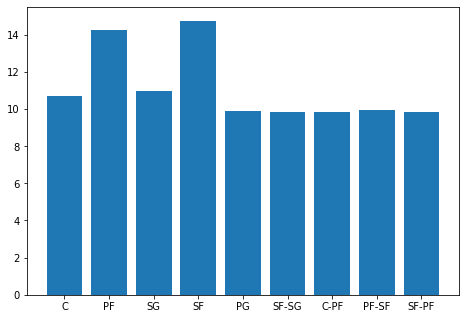

Michael Kidd-Gilchrist\kiddgmi01
Prediction: PF Actual: PF


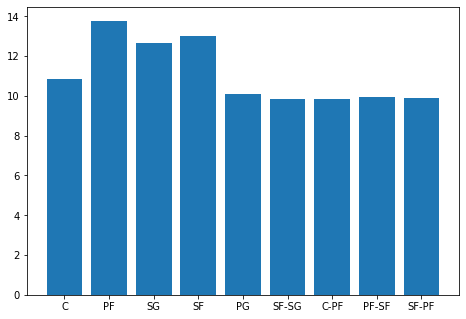

Dante Exum\exumda01
Prediction: SG Actual: SG


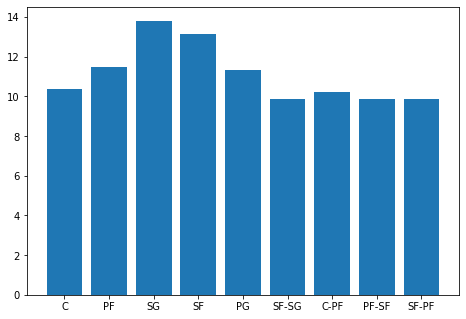

Derrick Rose\rosede01
Prediction: PG Actual: PG


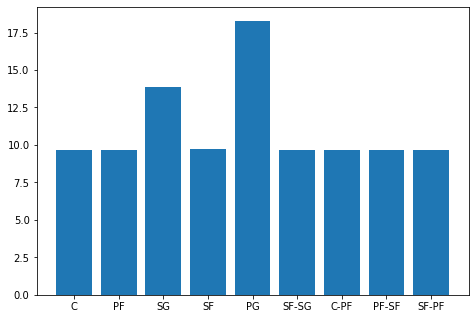

Aaron Holiday\holidaa01
Prediction: SG Actual: PG


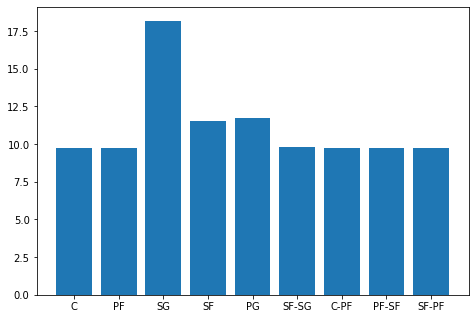

Carmelo Anthony\anthoca01
Prediction: C Actual: PF


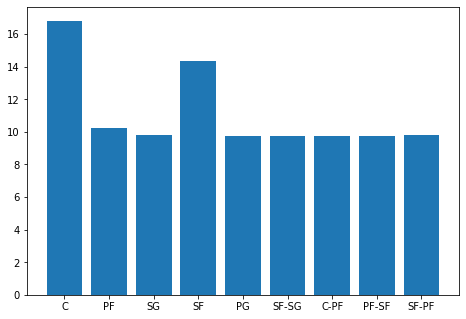

Malcolm Brogdon\brogdma01
Prediction: PG Actual: PG


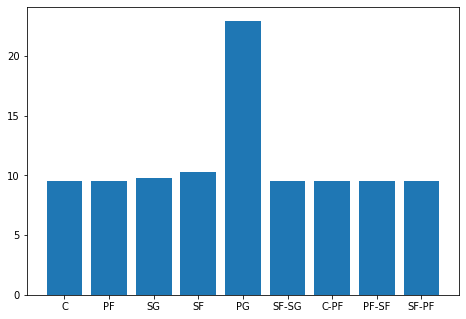

Alfonzo McKinnie\mckinal01
Prediction: SF Actual: SF


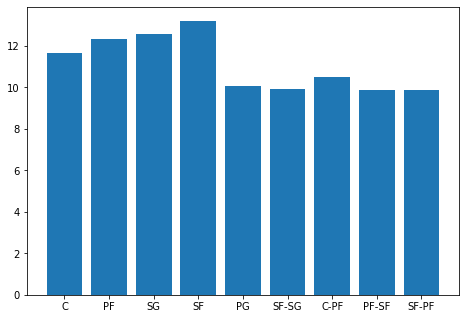

Seth Curry\curryse01
Prediction: SG Actual: SG


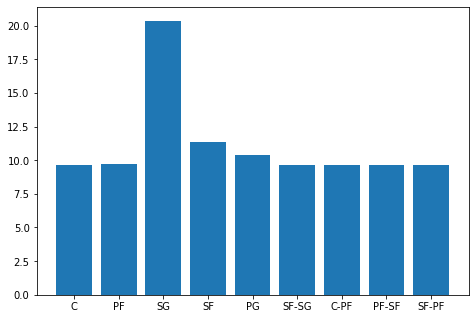

Rodions Kurucs\kurucro01
Prediction: SF Actual: PF


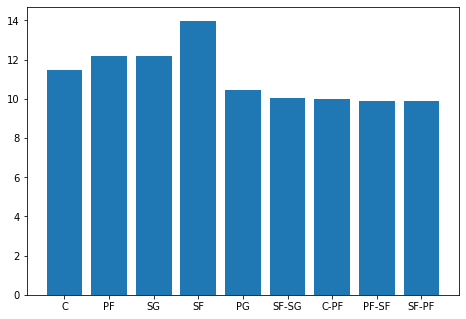

Malik Monk\monkma01
Prediction: SG Actual: SG


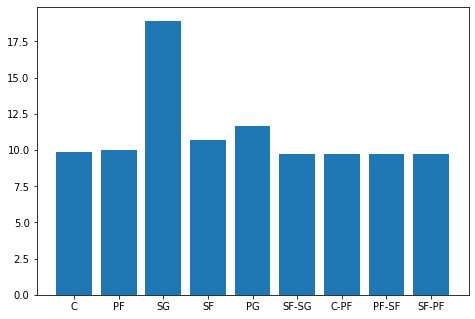

Jeff Green\greenje02
Prediction: SG Actual: PF


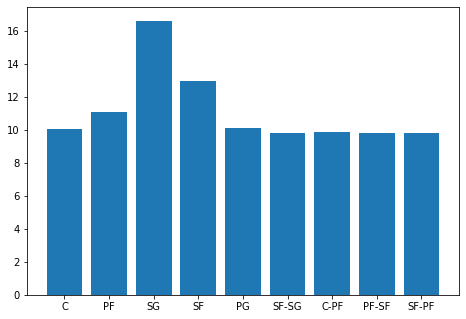

Ja Morant\moranja01
Prediction: PG Actual: PG


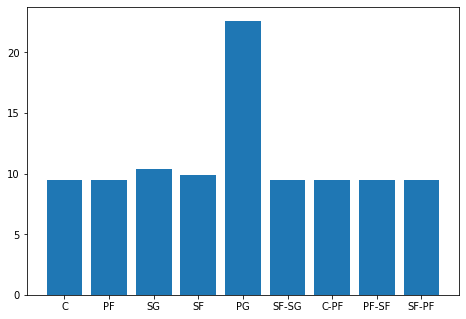

Vincent Poirier\poirivi01
Prediction: SF Actual: C


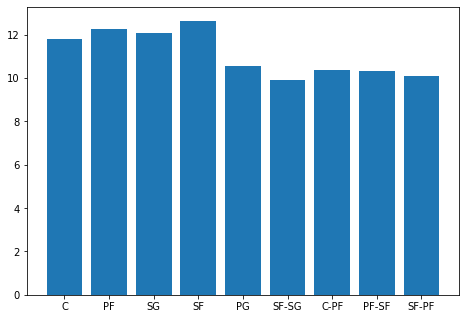

DeMarre Carroll\carrode01
Prediction: SF Actual: SF


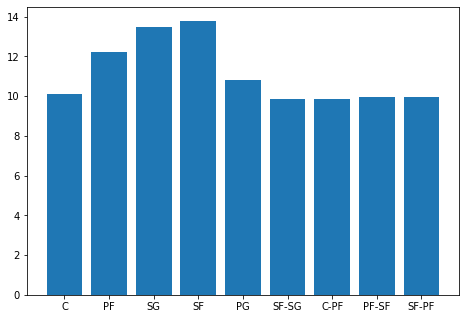

Tyler Herro\herroty01
Prediction: SG Actual: SG


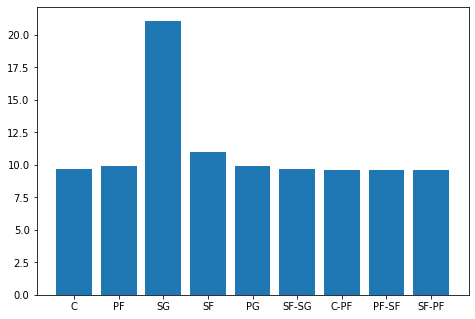

Jarrod Uthoff\uthofja01
Prediction: SG Actual: SF


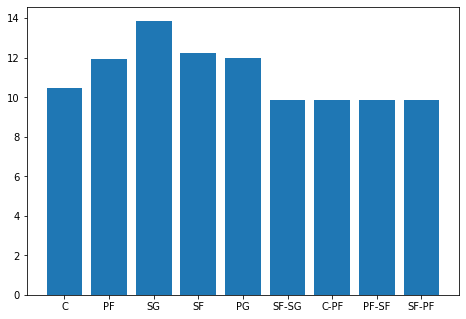

Pascal Siakam\siakapa01
Prediction: SF Actual: PF


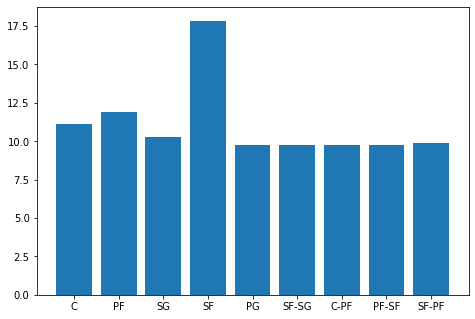

Russell Westbrook\westbru01
Prediction: SF Actual: PG


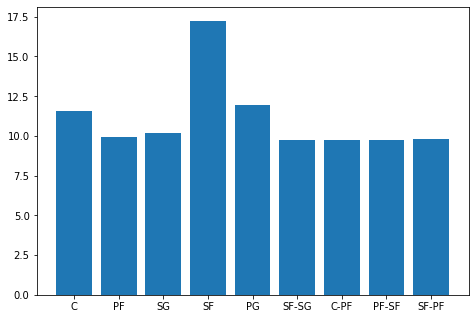

Jeff Teague\teaguje01
Prediction: PG Actual: PG


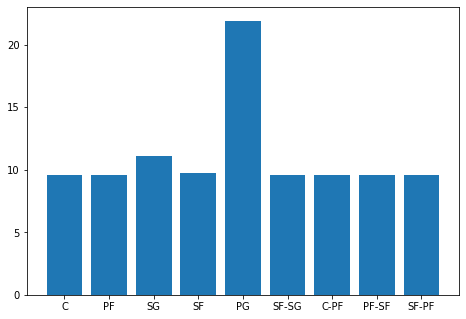

In [10]:
testPos = pos_test.to_numpy()
testPos = list(testPos[:,0])

for i in range(len(testPos)):
    print(names_test.iloc[i])
    print("Prediction: " + class_names[np.argmax(predictions[i])], "Actual: " + class_names[testPos[i]])
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(class_names, predictions[i] * 100)
    plt.show()